**Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
mbti = pd.read_csv('/content/mbti_1.csv')
mbti = mbti.iloc[1:2000]
mbti.shape

(1997, 2)

In [3]:
mbti['posts'] = mbti['posts'].map(lambda x : x.lower() if isinstance(x,str) else x)
mbti['type'] = mbti['type'].map(lambda x : x.lower() if isinstance(x,str) else x)
mbti.head()

,type,posts
1,entp,'i'm finding the lack of me in these posts ver...
2,intp,'good one _____ https://www.youtube.com/wat...
3,intj,"'dear intp, i enjoyed our conversation the o..."
4,entj,'you're fired.|||that's another silly misconce...
5,intj,'18/37 @.@|||science is not perfect. no scien...


In [4]:
mbti.isnull().sum()

,0
type,0
posts,0


In [5]:
mbti['type'].value_counts()

,count
type,
infp,451
infj,319
intp,291
intj,260
entp,169
enfp,142
istp,83
isfp,58
istj,49


In [6]:
mbti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 1 to 1997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    1997 non-null   object
 1   posts   1997 non-null   object
dtypes: object(2)
memory usage: 31.3+ KB


(-1.0999987626305539,
 1.0999999401428067,
 -1.0999988821888385,
 1.0999999467708972)

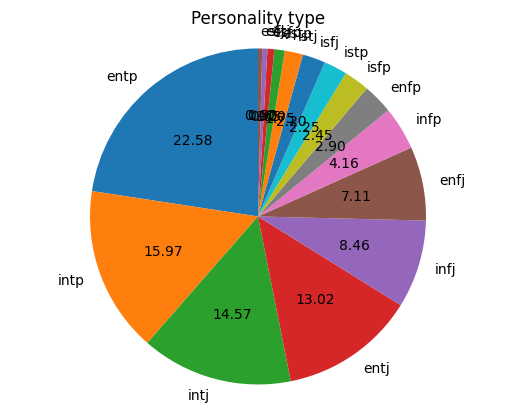

In [7]:
plt.pie(mbti['type'].value_counts(),labels = mbti['type'].unique(), autopct = '%.2f', startangle=90)
plt.title('Personality type')
plt.axis('equal')

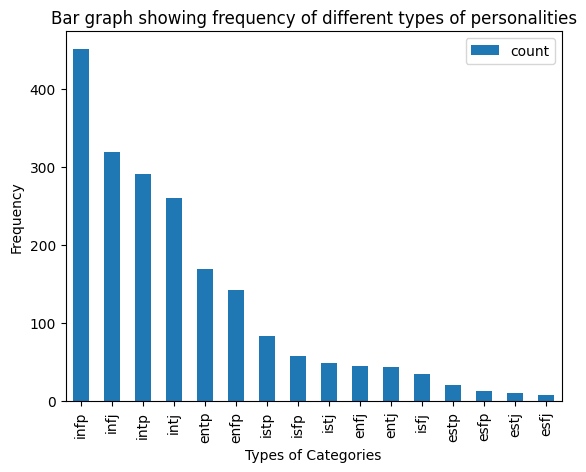

In [8]:
pd.DataFrame(mbti.type.value_counts()).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Types of Categories')
plt.title('Bar graph showing frequency of different types of personalities')
plt.show()


**Natural Language Processing**

Removing URLs

In [9]:
url_pattern = re.compile(r'https?://\S+')

def remove_url(text):
    return url_pattern.sub('',text)

mbti['posts'] = mbti['posts'].apply(remove_url)

mbti['posts']

,posts
1,'i'm finding the lack of me in these posts ver...
2,"'good one _____ course, to which i say i k..."
3,"'dear intp, i enjoyed our conversation the o..."
4,'you're fired.|||that's another silly misconce...
5,'18/37 @.@|||science is not perfect. no scien...
...,...
1993,'i had a job at a family owned fast paced rest...
1994,"yo who you callin a bitch ya lil ho ass ho, bo..."
1995,'simply being impulsive and reckless isn't inf...
1996,'irratinal process dom. honestly he makes such...


Removing non-word and non-whitespace characters

In [10]:
to_replace = (r'[^\w\s]')
mbti = mbti.replace(to_replace,"",regex = True)
mbti

,type,posts
1,entp,im finding the lack of me in these posts very ...
2,intp,good one _____ course to which i say i kno...
3,intj,dear intp i enjoyed our conversation the oth...
4,entj,youre firedthats another silly misconception t...
5,intj,1837 science is not perfect no scientist clai...
...,...,...
1993,infp,i had a job at a family owned fast paced resta...
1994,intp,yo who you callin a bitch ya lil ho ass ho bou...
1995,intp,simply being impulsive and reckless isnt infer...
1996,intj,irratinal process dom honestly he makes such a...


Removing digits

In [11]:
mbti = mbti.replace(r'\d','', regex = True)
mbti

,type,posts
1,entp,im finding the lack of me in these posts very ...
2,intp,good one _____ course to which i say i kno...
3,intj,dear intp i enjoyed our conversation the oth...
4,entj,youre firedthats another silly misconception t...
5,intj,science is not perfect no scientist claims t...
...,...,...
1993,infp,i had a job at a family owned fast paced resta...
1994,intp,yo who you callin a bitch ya lil ho ass ho bou...
1995,intp,simply being impulsive and reckless isnt infer...
1996,intj,irratinal process dom honestly he makes such a...


Tokenizing words

In [12]:
from nltk.tokenize import word_tokenize

mbti['posts'] = mbti['posts'].apply(word_tokenize)
mbti['posts']

,posts
1,"[im, finding, the, lack, of, me, in, these, po..."
2,"[good, one, _____, course, to, which, i, say, ..."
3,"[dear, intp, i, enjoyed, our, conversation, th..."
4,"[youre, firedthats, another, silly, misconcept..."
5,"[science, is, not, perfect, no, scientist, cla..."
...,...
1993,"[i, had, a, job, at, a, family, owned, fast, p..."
1994,"[yo, who, you, callin, a, bitch, ya, lil, ho, ..."
1995,"[simply, being, impulsive, and, reckless, isnt..."
1996,"[irratinal, process, dom, honestly, he, makes,..."


In [13]:
from nltk.corpus import stopwords

stop_word = set(stopwords.words('english'))

mbti['posts'] = mbti['posts'].apply(lambda x: [word for word in x if word not in stop_word])

mbti['posts']

,posts
1,"[im, finding, lack, posts, alarmingsex, boring..."
2,"[good, one, _____, course, say, know, thats, b..."
3,"[dear, intp, enjoyed, conversation, day, esote..."
4,"[youre, firedthats, another, silly, misconcept..."
5,"[science, perfect, scientist, claims, scientif..."
...,...
1993,"[job, family, owned, fast, paced, restaurant, ..."
1994,"[yo, callin, bitch, ya, lil, ho, ass, ho, bout..."
1995,"[simply, impulsive, reckless, isnt, inferior, ..."
1996,"[irratinal, process, dom, honestly, makes, hug..."


In [14]:
from  nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

mbti['posts'] = mbti['posts'].apply(stem_words)

mbti['posts']

,posts
1,"[im, find, lack, post, alarmingsex, bore, posi..."
2,"[good, one, _____, cours, say, know, that, ble..."
3,"[dear, intp, enjoy, convers, day, esoter, gab,..."
4,"[your, firedthat, anoth, silli, misconcept, ap..."
5,"[scienc, perfect, scientist, claim, scientif, ..."
...,...
1993,"[job, famili, own, fast, pace, restaur, absolu..."
1994,"[yo, callin, bitch, ya, lil, ho, ass, ho, bout..."
1995,"[simpli, impuls, reckless, isnt, inferior, se,..."
1996,"[irratin, process, dom, honestli, make, huge, ..."


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):

    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict ={'J': wordnet.ADJ,
                   'N': wordnet.NOUN,
                   'V': wordnet.VERB,
                   'R': wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return lemmas

mbti['lemmatized_posts'] = mbti['posts'].apply(lemmatize_tokens)

In [16]:
mbti

,type,posts,lemmatized_posts
1,entp,"[im, find, lack, post, alarmingsex, bore, posi...","[im, find, lack, post, alarmingsex, bore, posi..."
2,intp,"[good, one, _____, cours, say, know, that, ble...","[good, one, _____, cours, say, know, that, ble..."
3,intj,"[dear, intp, enjoy, convers, day, esoter, gab,...","[dear, intp, enjoy, convers, day, esoter, gab,..."
4,entj,"[your, firedthat, anoth, silli, misconcept, ap...","[your, firedthat, anoth, silli, misconcept, ap..."
5,intj,"[scienc, perfect, scientist, claim, scientif, ...","[scienc, perfect, scientist, claim, scientif, ..."
...,...,...,...
1993,infp,"[job, famili, own, fast, pace, restaur, absolu...","[job, famili, own, fast, pace, restaur, absolu..."
1994,intp,"[yo, callin, bitch, ya, lil, ho, ass, ho, bout...","[yo, callin, bitch, ya, lil, ho, as, ho, boutt..."
1995,intp,"[simpli, impuls, reckless, isnt, inferior, se,...","[simpli, impuls, reckless, isnt, inferior, se,..."
1996,intj,"[irratin, process, dom, honestli, make, huge, ...","[irratin, process, dom, honestli, make, huge, ..."


In [17]:
mbti['lemmatized_posts'] = mbti['lemmatized_posts'].apply(' '.join)

vec = CountVectorizer()
vec.fit(mbti['lemmatized_posts'])

CountVectorizer()

In [18]:
print(vec.vocabulary_, end = '')

{'im': 36362, 'find': 26614, 'lack': 42940, 'post': 60271, 'alarmingsex': 1870, 'bore': 9717, 'posit': 60180, 'often': 54628, 'exampl': 24316, 'girlfriend': 29890, 'current': 16809, 'environ': 23210, 'creativ': 16294, 'use': 83401, 'cowgirl': 16031, 'missionari': 49343, 'isnt': 39707, 'enoughgiv': 22913, 'new': 52192, 'mean': 47622, 'game': 29136, 'theoryhello': 77071, 'entp': 23081, 'grin': 31063, 'that': 75935, 'take': 74640, 'convers': 15360, 'flirt': 27136, 'acknowledg': 683, 'presenc': 60770, 'return': 64574, 'word': 87797, 'smooth': 70196, 'wordplay': 87821, 'cheeki': 12832, 'grinsthi': 31074, 'balanc': 7086, 'hand': 31971, 'eye': 25009, 'coordinationr': 15556, 'iq': 39247, 'test': 75637, 'score': 66741, 'internet': 38450, 'funni': 28857, 'high': 33939, 'like': 44445, 'former': 27668, 'respons': 64401, 'thread': 78674, 'mention': 48317, 'dont': 20173, 'believ': 8214, 'banishy': 7197, 'know': 42546, 'your': 89830, 'vanish': 83790, 'site': 69473, 'year': 89149, 'half': 31874, 'peop

In [19]:
x = mbti['lemmatized_posts']
y = mbti['type']

In [20]:
x.shape, y.shape


((1997,), (1997,))

In [21]:
vec1 = CountVectorizer(ngram_range = (1,3), min_df = 5, max_features = 8000)
x_vec = vec1.fit_transform(x).toarray()
x_vec

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Model Selection**

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, random_state = 0)

*K Nearest Neighbour Classifier*

In [38]:
kn = KNeighborsClassifier(n_neighbors = 21, metric = 'euclidean')
kn.fit(x_train, y_train)
kn.score(x_train, y_train), kn.score(x_test, y_test)

(0.4255177020708083, 0.37)

In [39]:
kn_pre = kn.predict(x_test)
print("The train accuracy score for model trained on K Nearest Neighbours Classifier is:",accuracy_score(y_train, kn.predict(x_train)))

print("The test accuracy score for model test on K Nearest Neighbours Classifier is :", accuracy_score(y_test, kn_pre))

print(classification_report(y_test, kn_pre))


The train accuracy score for model trained on K Nearest Neighbours Classifier is: 0.4255177020708083
The test accuracy score for model test on K Nearest Neighbours Classifier is : 0.37
              precision    recall  f1-score   support

        enfj       0.00      0.00      0.00        14
        enfp       0.67      0.14      0.23        44
        entj       0.00      0.00      0.00        11
        entp       0.33      0.36      0.34        36
        esfj       0.00      0.00      0.00         3
        esfp       0.00      0.00      0.00         2
        estj       0.00      0.00      0.00         3
        estp       0.00      0.00      0.00         6
        infj       0.42      0.35      0.38        82
        infp       0.33      0.74      0.46       117
        intj       0.42      0.43      0.43        63
        intp       0.40      0.29      0.34        68
        isfj       1.00      0.14      0.25         7
        isfp       0.00      0.00      0.00        14
    

*Naive Bayes*

In [40]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_train, y_train), nb.score(x_test, y_test)

(0.9873079492317969, 0.238)

In [41]:
nb_pre = nb.predict(x_test)
print("The train accuracy score for model trained on Gaussian Naive Bayes Classifier is:",accuracy_score(y_train, nb.predict(x_train)))

print("The test accuracy score for model test on K Gaussian Naive Bayes Classifier is :", accuracy_score(y_test, nb_pre))

print(classification_report(y_test, kn_pre))

The train accuracy score for model trained on Gaussian Naive Bayes Classifier is: 0.9873079492317969
The test accuracy score for model test on K Gaussian Naive Bayes Classifier is : 0.238
              precision    recall  f1-score   support

        enfj       0.00      0.00      0.00        14
        enfp       0.67      0.14      0.23        44
        entj       0.00      0.00      0.00        11
        entp       0.33      0.36      0.34        36
        esfj       0.00      0.00      0.00         3
        esfp       0.00      0.00      0.00         2
        estj       0.00      0.00      0.00         3
        estp       0.00      0.00      0.00         6
        infj       0.42      0.35      0.38        82
        infp       0.33      0.74      0.46       117
        intj       0.42      0.43      0.43        63
        intp       0.40      0.29      0.34        68
        isfj       1.00      0.14      0.25         7
        isfp       0.00      0.00      0.00        14
 

In [42]:
tf_idf = TfidfVectorizer()
x_tfidf = tf_idf.fit_transform(x).toarray()
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

*Support Vector Classifier*

In [43]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train), svc.score(x_test, y_test)

(0.8249832999331997, 0.54)

In [44]:
svc_pre = svc.predict(x_test)
print("The train accuracy score for model trained on Support Vector Classifier is:",accuracy_score(y_train, svc.predict(x_train)))

print("The test accuracy score for model test on Support Vector Classifier is :", accuracy_score(y_test, svc_pre))

print(classification_report(y_test, svc_pre))

The train accuracy score for model trained on Support Vector Classifier is: 0.8249832999331997
The test accuracy score for model test on Support Vector Classifier is : 0.54
              precision    recall  f1-score   support

        enfj       0.00      0.00      0.00        14
        enfp       0.86      0.27      0.41        44
        entj       0.00      0.00      0.00        11
        entp       0.59      0.47      0.52        36
        esfj       0.00      0.00      0.00         3
        esfp       0.00      0.00      0.00         2
        estj       0.00      0.00      0.00         3
        estp       0.00      0.00      0.00         6
        infj       0.66      0.59      0.62        82
        infp       0.45      0.88      0.59       117
        intj       0.62      0.57      0.60        63
        intp       0.57      0.76      0.65        68
        isfj       0.00      0.00      0.00         7
        isfp       0.00      0.00      0.00        14
        istj    

*Decision Tree Classifier*

In [45]:
ds = DecisionTreeClassifier()
ds.fit(x_train, y_train)
ds.score(x_train, y_train), ds.score(x_test, y_test)

(1.0, 0.492)

In [46]:
ds_pre = ds.predict(x_test)
print("The train accuracy score for model trained on Decision Tree Classifier is:",accuracy_score(y_train, ds.predict(x_train)))

print("The test accuracy score for model test on Decision Tree Classifier is :", accuracy_score(y_test, ds_pre))

print(classification_report(y_test, ds_pre))

The train accuracy score for model trained on Decision Tree Classifier is: 1.0
The test accuracy score for model test on Decision Tree Classifier is : 0.492
              precision    recall  f1-score   support

        enfj       0.09      0.07      0.08        14
        enfp       0.33      0.23      0.27        44
        entj       0.20      0.18      0.19        11
        entp       0.48      0.56      0.51        36
        esfj       0.00      0.00      0.00         3
        esfp       0.00      0.00      0.00         2
        estj       0.00      0.00      0.00         3
        estp       0.50      0.17      0.25         6
        infj       0.54      0.55      0.55        82
        infp       0.65      0.64      0.65       117
        intj       0.50      0.59      0.54        63
        intp       0.52      0.56      0.54        68
        isfj       0.00      0.00      0.00         7
        isfp       0.21      0.21      0.21        14
        istj       0.12      0.0

In [47]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test_ = le.transform(y_test)

In [48]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
xg.score(x_train, y_train), xg.score(x_test, y_test)

(1.0, 0.0)

In [49]:
xg_pre = nb.predict(x_test)
print("The train accuracy score for model trained on XGBoost Classifier is:",accuracy_score(y_train, xg.predict(x_train)))

print("The test accuracy score for model test on XGBoost Classifier is :", accuracy_score(y_test, xg_pre))

print(classification_report(y_test, xg_pre))

The train accuracy score for model trained on XGBoost Classifier is: 1.0
The test accuracy score for model test on XGBoost Classifier is : 0.238
              precision    recall  f1-score   support

        enfj       0.00      0.00      0.00        14
        enfp       1.00      0.02      0.04        44
        entj       0.00      0.00      0.00        11
        entp       0.00      0.00      0.00        36
        esfj       0.00      0.00      0.00         3
        esfp       0.00      0.00      0.00         2
        estj       0.00      0.00      0.00         3
        estp       0.00      0.00      0.00         6
        infj       0.18      0.20      0.19        82
        infp       0.26      0.78      0.39       117
        intj       0.17      0.06      0.09        63
        intp       0.19      0.10      0.13        68
        isfj       0.00      0.00      0.00         7
        isfp       0.00      0.00      0.00        14
        istj       0.00      0.00      0.00 